# Data Exploratory Analysis: Video games sales

## Table of Contents
<ul><li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Cleaning: Missing Values</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li></ul>

<a id='intro'></a>
## Introduction

This data set contains information about the sales of different videogames in USA, Europe, Japan, Other and Global sales. 

<a id='wrangling'></a>
## Structure and characteristics of the dataset

Each row contains the information about a videogame.
The columns of the data set, other than these sales, are the following ones:
*  Rank: shows the ranking of the Global sales for that videogame.
*  Name: shows the name of the videogame.
*  Platform: shows the platform of that videogame (Wii, PS2, XBox...)
*  Year: shows the year in which the videogame was published.
*  Genre: shows the genre of the videogame.
*  Publisher: shows the publisher of the videogame.

### General Properties

#### Import libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

#### Import Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### Import and print dataset

In [ ]:
# The dataset is loaded with Pandas
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Pandas/archivos/vgsales.csv")
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,KR_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,NaN,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,NaN,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,NaN,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,NaN,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,NaN,1.00,31.37


The column "Rank" tells us the ranking of the most sold games. To get these is as simple as sorting the data set by global sales, as it is right now. That column can be removed.

In [ ]:
df.drop(["Rank"], axis = 1, inplace = True)
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,KR_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,NaN,8.46,82.74
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,NaN,0.77,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,NaN,3.31,35.82
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,NaN,2.96,33.00
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,NaN,1.00,31.37


#### How big is the dataset? (Check rows & columns)

In [ ]:
# Let's check how many columns and rows the data set has
df.shape

(16601, 11)

#### Print name of all columns

In [ ]:
# Checking the name of the columns
df.columns

Index(['Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'KR_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

#### Checking the type of data for each column

In [ ]:
# Type information for each column and non-null exploration
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16601 entries, 0 to 16600
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          16590 non-null  object 
 1   Platform      16583 non-null  object 
 2   Year          16327 non-null  float64
 3   Genre         15941 non-null  object 
 4   Publisher     16533 non-null  object 
 5   NA_Sales      16598 non-null  float64
 6   EU_Sales      16598 non-null  object 
 7   JP_Sales      16597 non-null  float64
 8   KR_Sales      56 non-null     object 
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16558 non-null  float64
dtypes: float64(5), object(6)
memory usage: 1.4+ MB


Europe sales data are in string instead of float. This information should be changed.

In [ ]:
df['EU_Sales'] = df['EU_Sales'].str.replace('O','0')

In [ ]:
df["EU_Sales"] = df['EU_Sales'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16601 entries, 0 to 16600
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          16590 non-null  object 
 1   Platform      16583 non-null  object 
 2   Year          16327 non-null  float64
 3   Genre         15941 non-null  object 
 4   Publisher     16533 non-null  object 
 5   NA_Sales      16598 non-null  float64
 6   EU_Sales      16598 non-null  float64
 7   JP_Sales      16597 non-null  float64
 8   KR_Sales      56 non-null     object 
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16558 non-null  float64
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


#### Statistical description of the dataset

In [ ]:
# Statistical approach of the data set
df.describe()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16327.000000,16598.000000,16598.000000,16597.000000,16598.000000,16558.000000
mean,2006.406443,0.264667,0.146647,0.077769,0.048063,0.534327
std,5.828981,0.816683,0.505353,0.309296,0.188588,1.533771
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


#### Analyzing duplicate values

In [ ]:
# Let's see if there are duplicated values in the dataset
df.duplicated(keep = 'last').value_counts()

False    16600
True         1
dtype: int64

In [ ]:
# Removing duplicates
df = df.drop_duplicates()
df = df.reset_index()
df = df.drop('index', axis = 1)

There was one duplicate and it has already been removed.

### Data Cleaning: Missing Values and Pre-Processing

After discussing the structure of the data and any problems that need to be cleaned, let's perform those cleaning steps in this section.

We have seen that there are some vg that have NaN values on the sales. These videogames offer no information about sales, so they should be removed.

In [ ]:
df.tail()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,KR_Sales,Other_Sales,Global_Sales
16595,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.0,NaN,0.0,0.01
16596,Spirits & Spells,GBA,2003.0,Platform,NaN,0.01,0.00,0.0,NaN,0.0,0.01
16597,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16598,Guild Wars 2,PC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16599,World of Warcraft,PC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Locate and drop the rows with nans in all numeric columns
indexes = []
for i in range(df.shape[0]):
  if pd.isnull(df.loc[i][5]) == True:
    if pd.isnull(df.loc[i][6]) == True:
      if pd.isnull(df.loc[i][7]) == True:
        if pd.isnull(df.loc[i][8]) == True:
          if pd.isnull(df.loc[i][9]) == True:
            if pd.isnull(df.loc[i][10]) == True:
              indexes.append(i)
df = df.drop(indexes, axis = 0)

## Outliers
In this phase of the analysis, I am going to check the variability of the data and remove possible outliers if needed.

In [ ]:
numeric_columns = []
for i in range(5,11):
  numeric_columns.append(df.columns[i])
numeric_columns.remove("KR_Sales")
numeric_columns

['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.



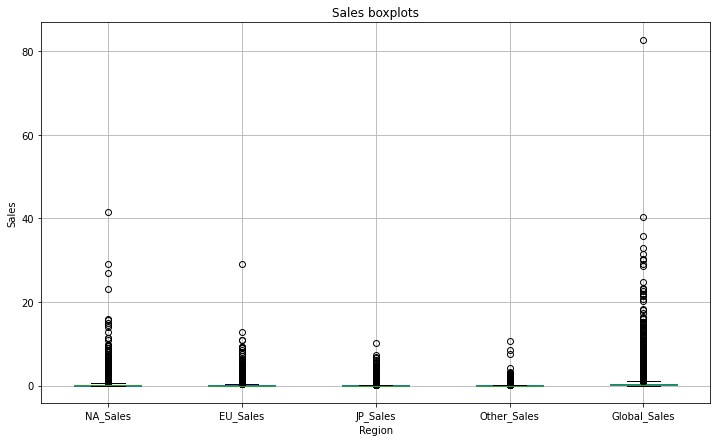

In [ ]:
fig_dims = (12,7)
fig, ax = plt.subplots(figsize = fig_dims)
ax.set_title('Sales boxplots')
ax.set_xlabel('Region')
ax.set_ylabel('Sales')
boxplot = df.boxplot(column=numeric_columns)

In [ ]:
non_zero_NA = df[(df["NA_Sales"]>0)]
non_zero_EU = non_zero_NA[(non_zero_NA["EU_Sales"]>0)]
non_zero_JP = non_zero_EU[(non_zero_EU["JP_Sales"]>0)]
non_zero_Other = non_zero_JP[(non_zero_JP["Other_Sales"]>0)]
non_zero_Global = non_zero_Other[(non_zero_Other["Global_Sales"]>0)]

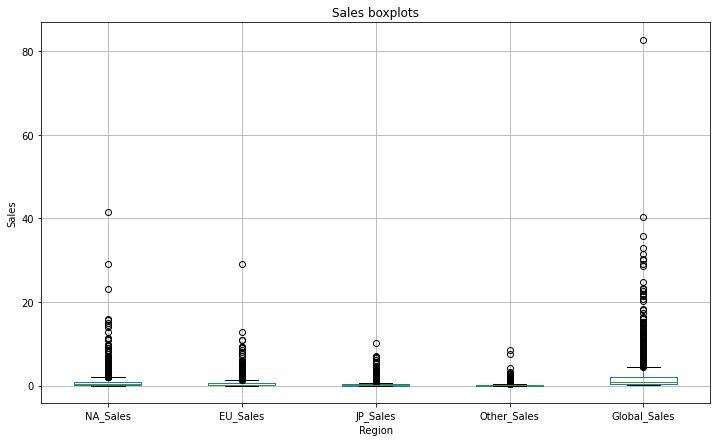

In [ ]:
fig_dims = (12,7)
fig, ax = plt.subplots(figsize = fig_dims)
ax.set_title('Sales boxplots')
ax.set_xlabel('Region')
ax.set_ylabel('Sales')
boxplot = non_zero_Global.boxplot(column=numeric_columns)

What's happening is that, there are a lot of tiny videogames with very little sales, while there are a few giant videogames with enormous sales. In that case, if any of these has NaNs, those values should be replaced by the median, not by the mean.

## NaNs
In this phase of the analysis, I am going to check the possible NaNs that the different columns may have.

In [ ]:
# Finding out if there are missing values in the dataset
df.isna().any()

Name             True
Platform         True
Year             True
Genre            True
Publisher        True
NA_Sales        False
EU_Sales        False
JP_Sales         True
KR_Sales         True
Other_Sales     False
Global_Sales     True
dtype: bool

All of the columns have NaNs. Let's see how many NaNs are in each column.

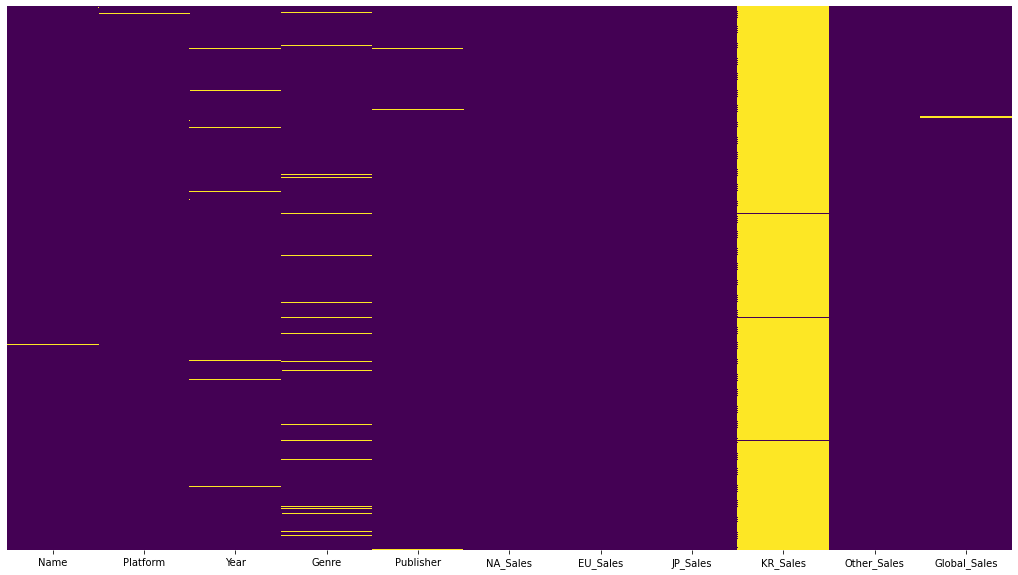

In [ ]:
fig = plt.subplots(figsize=(18,10))
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

KR_Sales is almost all NaNs. That column should be removed.

In [ ]:
df.drop(["KR_Sales"], axis = 1, inplace = True)

In [ ]:
# Let's see the percentage of NaNs on each column.
df.isna().sum()*100/df.shape[0]

Name            0.060252
Platform        0.102428
Year            1.626800
Genre           3.958547
Publisher       0.391637
NA_Sales        0.000000
EU_Sales        0.000000
JP_Sales        0.006025
Other_Sales     0.000000
Global_Sales    0.241007
dtype: float64

All of the columns have NaNs. Some of them in a very little percentage. Even so, I'll remove them all. In the columns with the data in strings, and the year, the NaNs will be replaced by a sentence "no XXX". In the columns with the data in float, the NaNs will be replaced by the median of that column.

In [ ]:
df["Name"].replace(np.nan,"no name",inplace = True)
df["Platform"].replace(np.nan,"no platform",inplace = True)
df["Year"].replace(np.nan,"no year",inplace = True)
df["Genre"].replace(np.nan,"no genre",inplace = True)
df["Publisher"].replace(np.nan,"no publisher",inplace = True)

In [ ]:
df.describe()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16597.000000,16597.000000,16596.000000,16597.000000,16557.000000
mean,0.264683,0.146656,0.077773,0.048066,0.534358
std,0.816705,0.505367,0.309305,0.188594,1.533812
min,0.000000,0.000000,0.000000,0.000000,0.010000
25%,0.000000,0.000000,0.000000,0.000000,0.060000
50%,0.080000,0.020000,0.000000,0.010000,0.170000
75%,0.240000,0.110000,0.040000,0.040000,0.470000
max,41.490000,29.020000,10.220000,10.570000,82.740000


In [ ]:
for i in range(5):
  median = df.describe().iloc[5][i]
  df[df.columns[i+5]].fillna(median, inplace = True)

Since median is the 50%, in the df.describe we already have the values of median for each numeric column.

In [ ]:
df.isna().sum()

Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

With this, we can check that we have no more nans on the dataset.

<a id='eda'></a>
## Exploratory Data Analysis

Let's move on to exploratory data analysis in this section. First, I will look carefully at the variables individually. Then, I will proceed to study the correlation relationships

### Univariate Variables

In this step, I am going to analyze the distribution of each numeric and categorical attribute on the dataset.

In [ ]:
df.describe(include='all')  

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16597,16597,16597.0,16597,16597,16597.000000,16597.000000,16597.000000,16597.000000,16597.000000
unique,11488,32,40.0,13,579,NaN,NaN,NaN,NaN,NaN
top,Need for Speed: Most Wanted,DS,2009.0,Action,Electronic Arts,NaN,NaN,NaN,NaN,NaN
freq,12,2163,1431.0,3316,1351,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,0.264683,0.146656,0.077768,0.048066,0.533480
std,NaN,NaN,NaN,NaN,NaN,0.816705,0.505367,0.309296,0.188594,1.532067
min,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.010000
25%,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.060000
50%,NaN,NaN,NaN,NaN,NaN,0.080000,0.020000,0.000000,0.010000,0.170000
75%,NaN,NaN,NaN,NaN,NaN,0.240000,0.110000,0.040000,0.040000,0.470000


### Bivariate Variables
In this section, I will analyze the correlation of different pairs of variables.

In [ ]:
# I'll create a list with the sales columns titles and another one with the numeric columns titles.
sales_columns = []
numeric_columns = ["Year"]
for i in range(5):
  sales_columns.append(df.columns[i+5])
  numeric_columns.append(df.columns[i+5])
print(sales_columns)
print(numeric_columns)

['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']
['Year', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']


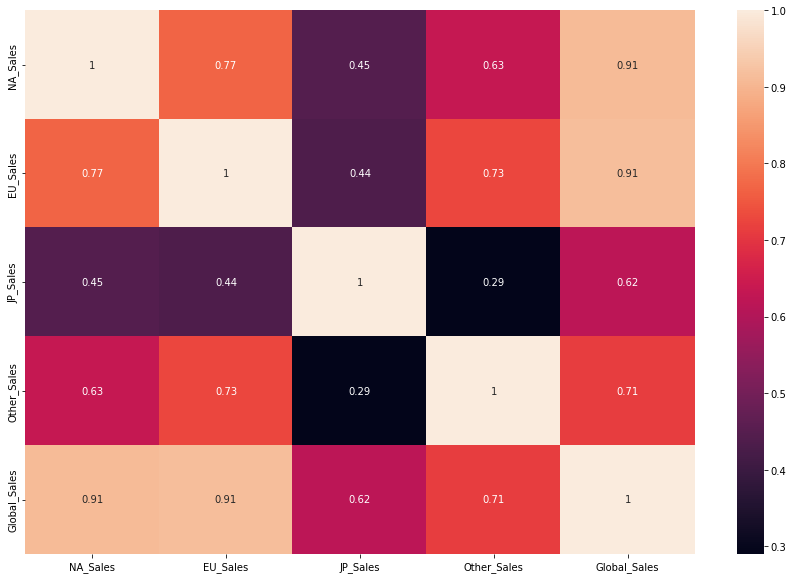

In [ ]:
df_numeric = df.filter(items = numeric_columns)
fig_dims = (15,10)
fig, ax = plt.subplots(figsize = fig_dims)
sns.heatmap(df_numeric.corr(), annot=True)

Global sales has a strong correlation with NA and Europe, which makes sense because those regions are the ones that consume the most. Strangely, Japan has a low correlation with global sales. That may be that the kind of videogames Japan buys is different from Europe and NA.

### Key Point Analysis
First, I will look carefully at the variables involved in each question, and then I will analyze the relationship between them.

1. Which one is the videogame with more sales in each region?

In [ ]:
# We create a data set with the proper columns and sort it by sales.
df_na = df.filter(items = ["Name","NA_Sales"]) 
df_na.sort_values(by = "NA_Sales", inplace = True, ascending = False)
df_na.head(1) # We extract the first title

,Name,NA_Sales
0,Wii Sports,41.49


In [ ]:
df_eu = df.filter(items = ["Name","EU_Sales"])
df_eu.sort_values(by = "EU_Sales", inplace = True, ascending = False)
df_eu.head(1)

,Name,EU_Sales
0,Wii Sports,29.02


In [ ]:
df_jp = df.filter(items = ["Name","JP_Sales"])
df_jp.sort_values(by = "JP_Sales", inplace = True, ascending = False)
df_jp.head(1)

,Name,JP_Sales
4,Pokemon Red/Pokemon Blue,10.22


In [ ]:
df_other = df.filter(items = ["Name","Other_Sales"])
df_other.sort_values(by = "Other_Sales", inplace = True, ascending = False)
df_other.head(1)

,Name,Other_Sales
17,Grand Theft Auto: San Andreas,10.57


Except in "Other Sales", the most sold videogame is always a Nintendo videogame. NA and Europe agree on Wii Sports.

2. Which are the five publishers that got more sales worldwide?

In [ ]:
# Create a data set with the publishers and global sales, create a group by adding the global sales
df_publisher_sales = df.filter(items = ["Publisher","Global_Sales"])
gb_publisher_sales = df_publisher_sales.groupby(by = "Publisher").sum().reset_index()

# Sort it descending
gb_publisher_sales.sort_values(by = "Global_Sales", inplace = True, ascending = False)
gb_publisher_sales.head()

,Publisher,Global_Sales
359,Nintendo,1757.97
138,Electronic Arts,1109.06
21,Activision,726.62
456,Sony Computer Entertainment,607.07
525,Ubisoft,473.88


3. How have these five publishers evolved with the years of the data set?

In [ ]:
# Create a new data set with the five biggest publishers
five_publishers = ["Nintendo","Electronic Arts","Activision","Sony Computer Entertainment","Ubisoft"]
df_five_publishers = df[df["Publisher"].isin(five_publishers)]
df_five_publishers = df_five_publishers[df_five_publishers["Year"] != "no year"]
df_publisher_year_sales = df_five_publishers.filter(items = ["Publisher","Year","Global_Sales"])

# Group by by publisher and year to get the sales of each publisher for every year
gb_publisher_year_sales = df_publisher_year_sales.groupby(by = ["Publisher","Year"]).sum().reset_index() 
print(gb_publisher_year_sales)

      Publisher    Year  Global_Sales
0    Activision  1980.0          3.02
1    Activision  1981.0          8.50
2    Activision  1982.0          1.86
3    Activision  1983.0          1.94
4    Activision  1984.0          0.27
..          ...     ...           ...
131     Ubisoft  2013.0         27.39
132     Ubisoft  2014.0         41.95
133     Ubisoft  2015.0         12.79
134     Ubisoft  2016.0          9.76
135     Ubisoft  2020.0          0.29

[136 rows x 3 columns]


[Text(0.5, 1.0, 'Sales per publisher')]

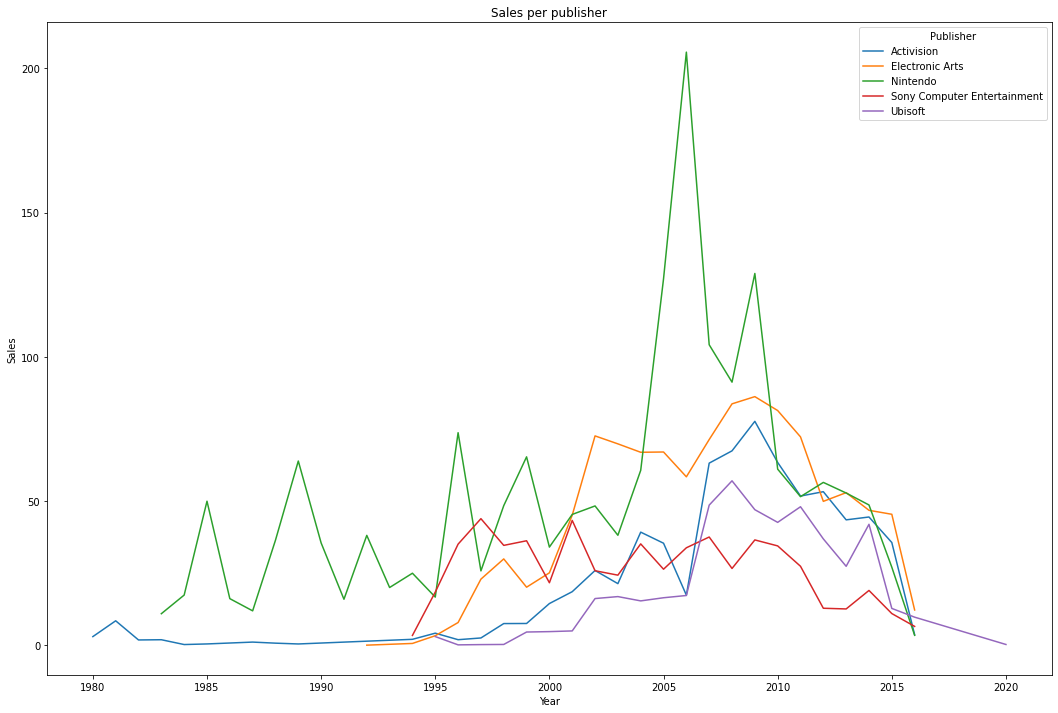

In [ ]:
# Create a lineplot with the previous data
fig_dims = (18,12)
fig, ax = plt.subplots(figsize = fig_dims)
ax.set(xlabel='Year', ylabel='Sales')
sns.lineplot(data=gb_publisher_year_sales, x = "Year", y ="Global_Sales", hue = "Publisher").set(title='Sales per publisher')

Looking the Nintendo graphic and its peaks around 2005-2010, we should see, first of all, which exact years were those peaks, and second, take a look at which games generated that sells.

Looking at the rest of the publishers, we see an increase tendency of sales. This may be due to the popularization of videogames. Around 2012 all of them strongly decrease. That may be due to the number of indie publishers that exist nowadays compared to the previous years. A study of number of publishers per decade should give us that information.

4. What is the cause of those two peaks around 2005-2010 on the Nintendo trends?

In [ ]:
# Filtering by Nintendo and sorting the data we can extract the years of those two peaks
df_nintendo = df[(df["Publisher"] == "Nintendo") & (df["Year"] != "no year")]
df_nintendo = df_nintendo.filter(items = ["Name","Publisher","Platform","Year","Global_Sales"])
gb_nintendo = df_nintendo.groupby(by = "Year").sum().reset_index()
gb_nintendo.sort_values(by = "Global_Sales", ascending = False).head(2)

,Year,Global_Sales
23,2006.0,205.61
26,2009.0,128.89


Those two peaks are on years 2006 and 2009.

5. Which ones are the games and platform of the Nintendo videogames that generated more sales in 2006 and 2009?

In [ ]:
# Create a dataset only with Nintendo games of 2006
df_nintendo_2006 = df_nintendo[df_nintendo["Year"] == 2006]
df_nintendo_2006.head()


,Name,Publisher,Platform,Year,Global_Sales
0,Wii Sports,Nintendo,Wii,2006.0,82.74
6,New Super Mario Bros.,Nintendo,DS,2006.0,30.01
7,Wii Play,Nintendo,Wii,2006.0,29.02
20,Pokemon Diamond/Pokemon Pearl,Nintendo,DS,2006.0,18.36
100,The Legend of Zelda: Twilight Princess,Nintendo,Wii,2006.0,7.31


In [ ]:
print(f"In 2006 Nintendo published {df_nintendo_2006.shape[0]} videogames")

In 2006 Nintendo published 53 videogames


In [ ]:
# Create a dataset only with Nintendo games of 2009
df_nintendo_2009 = df_nintendo[df_nintendo["Year"] == 2009]
df_nintendo_2009.head()

,Name,Publisher,Platform,Year,Global_Sales
3,Wii Sports Resort,Nintendo,Wii,2009.0,33.00
8,New Super Mario Bros. Wii,Nintendo,Wii,2009.0,28.62
14,Wii Fit Plus,Nintendo,Wii,2009.0,22.00
45,Pokemon HeartGold/Pokemon SoulSilver,Nintendo,DS,2009.0,11.90
149,Dragon Quest IX: Sentinels of the Starry Skies,Nintendo,DS,2009.0,5.84


In [ ]:
print(f"In 2009 Nintendo published {df_nintendo_2009.shape[0]} videogames")

In 2009 Nintendo published 32 videogames


In 2006 the videogame with most sales was Wii Sports, of Wii (Published in November 2006) and in 2009 it was Wii Sports Resort, of Wii as well.
In 2006 the main sales were from Wii and Nintendo DS, but in 2009 was mainly 2009.

Seeing that, for the five different publishers, we have maximums at the 2000 decade and, after 2010, the sales fastly decrease, it would be nice to take a look at the development of the publishers and videogames sales and publishing over the years.

6. How many different publishers existed and how many videogames were published and sold between 1980 and 2020?

In [ ]:
year = []
publishers = []
videogames = []
sales = []
for i in range(1980,2021):
  fi = float(i)
  year.append(i)
  df_i = df[df["Year"] == fi]
  publishers.append(df_i["Publisher"].nunique())
  videogames.append(df_i.shape[0])
  sales.append(df_i["Global_Sales"].sum(axis = 0, skipna = True))

In [ ]:
d = {"Year":year, "Publishers":publishers, "Videogames":videogames, "Sales":sales}
df_years = pd.DataFrame(d)
df_years.head(10)

,Year,Publishers,Videogames,Sales
0,1980,2,9,11.38
1,1981,14,46,34.93
2,1982,18,36,28.86
3,1983,4,17,16.79
4,1984,4,14,22.22
5,1985,6,14,53.94
6,1986,6,21,37.07
7,1987,8,16,21.74
8,1988,7,15,47.22
9,1989,9,17,73.45


[Text(0.5, 1.0, 'Publishers, videogames and sales over the years')]

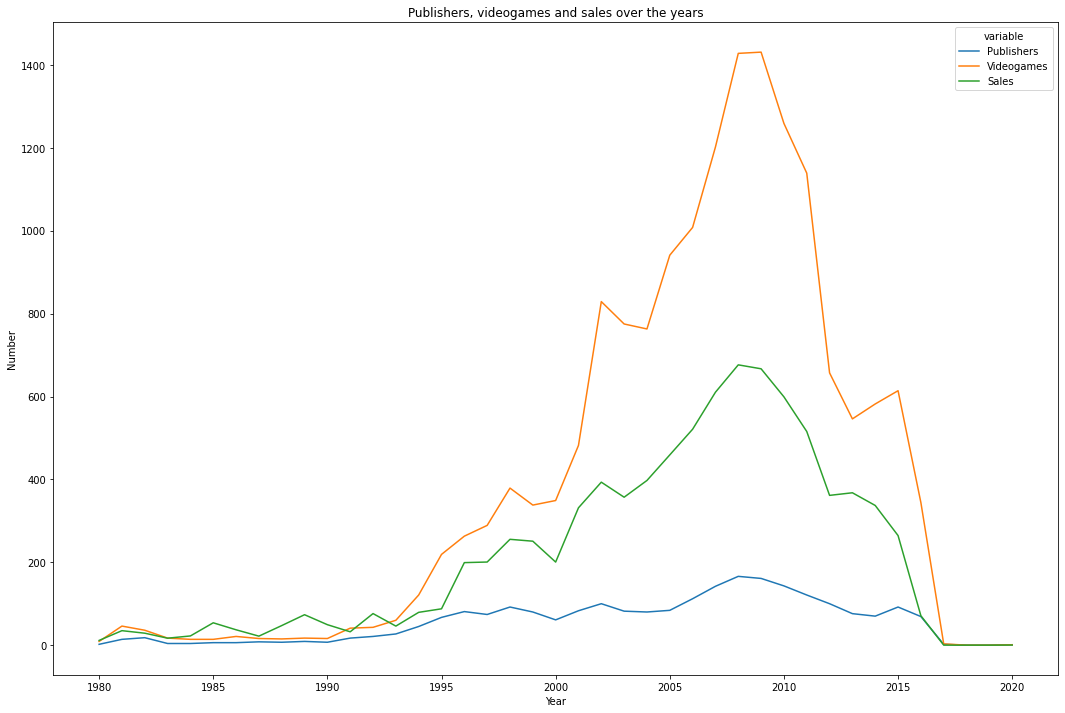

In [ ]:
fig_dims = (18,12)
fig, ax = plt.subplots(figsize = fig_dims)
ax.set(xlabel = 'Year', ylabel = 'Number')
sns.lineplot(x='Year', y='value', hue='variable', data=pd.melt(df_years, ['Year'])).set(title = 'Publishers, videogames and sales over the years')

In this lineplot we see a peak between 2005 and 2010, but after 2010 all the variables fastly decrease. On platforms, mobile phone's videogames are not on the data set. Nowadays, an important percentage of videogames are through smartphones, with they don't appear in this data set. This could be one cause of this decrease in videgames sales and production. The other one could be that the data is incomplete. For instance, no Nintendo Switch videogames are published, while the console was published on March 2017.

7. Would the data show any change if it's sorted and gathered by decades instead of years?

In [ ]:
def dec(df_years):
  d = df_years["Year"]//10
  return int(d*10) # This way we create the decade of every year.
df_years.insert(df_years.shape[1], "Decade", df_years.apply(dec, axis = 1))

# Create a column with the decade of each year.
df_years.sample(10)

,Year,Publishers,Videogames,Sales,Decade
7,1987,8,16,21.74,1980
30,2010,143,1259,599.18,2010
40,2020,1,1,0.29,2020
16,1996,81,263,199.15,1990
36,2016,69,344,70.93,2010
34,2014,70,582,337.05,2010
21,2001,83,482,331.47,2000
22,2002,100,829,393.27,2000
3,1983,4,17,16.79,1980
27,2007,142,1202,610.29,2000


In [ ]:
# Remove the decade of 2020 because it has only 1 year
df_decade = df_years.drop("Year", axis = 1)
gb_decade = df_decade.groupby(by = "Decade").sum().reset_index()
gb_decade = gb_decade.drop(4) 
gb_decade

,Decade,Publishers,Videogames,Sales
0,1980,78,205,347.60
1,1990,511,1769,1276.56
2,2000,1071,9208,4613.31
3,2010,673,5144,2516.34


[Text(0.5, 1.0, 'Publishers, videogames and sales over the decades')]

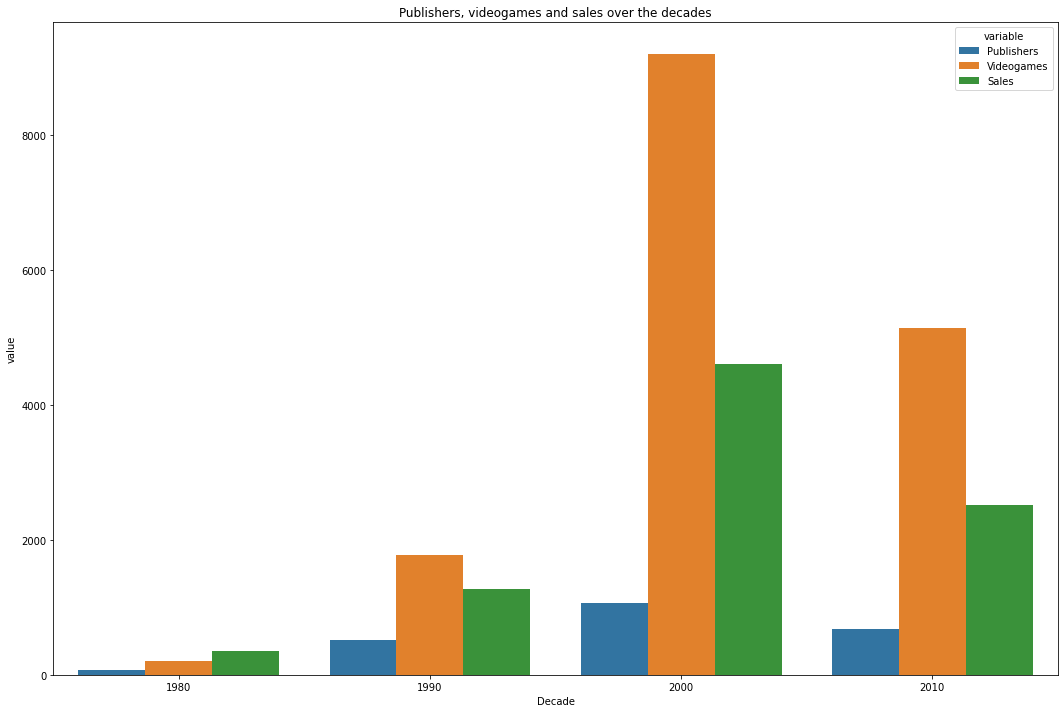

In [ ]:
fig_dims = (18,12)
fig, ax = plt.subplots(figsize = fig_dims)
ax.set(xlabel = 'Decade', ylabel = 'Number')
sns.barplot(x='Decade', y='value', hue='variable', data=pd.melt(gb_decade, ['Decade'])).set(title = 'Publishers, videogames and sales over the decades')

When we arrange the data by decades instead of years we obtain the same kind of information. The decade of 2000 has the highest values, since it's the decade that contains both 2006 and 2009.

8. Which one is the genre with more sales for each publisher?

In [ ]:
# Filter by publisher, genre and global sales and groupby by publisher and genre
df_genres = df[(df["Genre"] != "no genre") & (df["Publisher"] != "no publisher")]
df_genres = df_genres.filter(items = ["Publisher","Genre","Global_Sales"])
gb_genres = df_genres.groupby(by = ["Publisher","Genre"]).sum().reset_index()

# Create a new data set with the genre of each publisher with the most sales
df_genre = pd.DataFrame(columns = ["Publisher","Genre","Sales"])
for i in gb_genres["Publisher"].unique():
  genre = gb_genres[gb_genres["Publisher"]==i].sort_values("Global_Sales",ascending=False)["Genre"].iloc[0]
  sales = gb_genres[gb_genres["Publisher"]==i]["Global_Sales"].max()
  df_genre = df_genre.append({"Publisher":i,"Genre":genre,"Sales":sales}, ignore_index = True)
df_genre.sort_values("Sales", inplace = True, ascending = False)
df_genre


,Publisher,Genre,Sales
138,Electronic Arts,Sports,478.83
354,Nintendo,Platform,427.21
21,Activision,Shooter,299.87
484,Take-Two Interactive,Action,190.02
514,Ubisoft,Action,142.52
...,...,...,...
513,UIG Entertainment,Simulation,0.01
459,Stainless Games,Action,0.01
132,EON Digital Entertainment,Strategy,0.01
485,Takuyo,Adventure,0.01


9. Which ones are the platforms with more sales?

In [ ]:
# Group by by platform and sort by gobal sales.
df_platform = df.filter(items = ["Platform","Global_Sales"])
df_platform = df_platform[df_platform["Platform"] != "no platform"]
gb_platform = df_platform.groupby(by = "Platform").sum().reset_index()
gb_platform.sort_values(by = "Global_Sales", inplace = True, ascending = False)
gb_platform.head()

,Platform,Global_Sales
16,PS2,1232.47
17,PS3,956.57
26,Wii,925.01
28,X360,888.14
4,DS,821.64


The five platforms that had more sales were all published in the 2000 decade. Surprisingly, the two platforms with more sales were PS2 and PS3, none of them are Nintendo's. 

10. Between Mario, Zelda and Pokemon, which one of these sagas has sold the most and published more videogames?

In [ ]:
# Filter by games that contain "Mario", then sum their global sales and count the number of videogames.
mario_sales = 0
df_mario = df[df["Name"].str.contains("Mario ")]
for i in range(df_mario.shape[0]):
  mario_sales += df_mario.iloc[i][9]
print(f"The Mario saga has published {df_mario.shape[0]} videogames and sold {mario_sales}. The ratio is {mario_sales/df_mario.shape[0]}")

The Mario saga has published 104 videogames and sold 534.2. The ratio is 5.136538461538462


In [ ]:
# Filter by games that contain "Zelda", then sum their global sales and count the number of videogames.
zelda_sales = 0
df_zelda = df[df["Name"].str.contains("Zelda")]
for i in range(df_zelda.shape[0]):
  zelda_sales += df_zelda.iloc[i][9]
print(f"The Zelda saga has published {df_zelda.shape[0]} videogames and sold {zelda_sales}. The ratio is {zelda_sales/df_zelda.shape[0]}")

The Zelda saga has published 27 videogames and sold 82.64. The ratio is 3.0607407407407408


In [ ]:
# Filter by games that contain "Pokemon", then sum their global sales and count the number of videogames.
pokemon_sales = 0
df_pokemon = df[df["Name"].str.contains("Pokemon")]
for i in range(df_pokemon.shape[0]):
  pokemon_sales += df_pokemon.iloc[i][9]
print(f"The Pokemon saga has published {df_pokemon.shape[0]} videogames and sold {pokemon_sales}. The ratio is {pokemon_sales/df_pokemon.shape[0]}")

The Pokemon saga has published 35 videogames and sold 202.08000000000007. The ratio is 5.773714285714288


Mario is by far the saga with most sales. After that, comes Pokemon and last Zelda. If we take a look at the ratios sales/videogames, Pokemon holds the highest rate, being a bit higher than Mario's.

<a id='conclusions'></a>
## Conclusions

Let's summarize the findings and the results of the analysis.

1. The videogames with more sales in each region are Wii Sports for NA and Europe, Pokemon Red/Blue for Japan and GTA: San Andreas for Others.
2. The publishers with more sales are Nintendo, Electronic Arts, Activision, Sony Computer Entertainment and Ubisoft.
3. We see two big peaks in nintendo around 2005 and 2010. All of the publishers have their maximums in the decade of 2000. After 2012 all of them rapidly decrease.
4. Those two Nintendo peaks were on 2006 and 2009.
5. The peak on 2006, which is the big one, is due to the publication of Nintendo Wii and Wii sports. The second peak is due to Nintendo Wii Sports Resort.
6. We see that, like the sales of the different publishers, we have the maximum in videogames publishes ad publishers in the 2000 decade. After 2012, all of them rapidly decrease. This may be due to the uncomplete data (there is no Nintendo Switch, for instance) and there is no "Smartphone" on platforms. Nowadays there are tons of videogames for smartphones.
7. If we group the data by decades, we obtain the same information that for years.
8. For EA the most profitable genre is sports. For Nintendo is Platform, for Activision shooters. These are the three main publishers.
9. The five platforms that had more sales were all published in the 2000 decade. Surprisingly, the two platforms with more sales were PS2 and PS3, none of them are Nintendo's. 
10. Mario is by far the saga with most sales. After that, comes Pokemon and last Zelda. If we take a look at the ratios sales/videogames, Pokemon holds the highest rate, being a bit higher than Mario's.

## Bibliography
- Title Document 1: URL
- Title Document 2: URL
- Title Document 3: URL